## DIVING DEEP INTO MACHINE LEARNING

<u>**SUPERVISED LEARNING**</u>
1. **Regression Analysis**
Regression is the most popular algorithm in statistics and machine learning. In the machine learning and data science field, regression analysis is a member of the supervised machine learning domain that helps us to predict continuous variables such as stock prices, house prices, sales, rainfall, and temperature. As a sales manager at an electronic store, for example, say you need to predict the sales of upcoming weeks for all types of products, such as televisions, air conditioners, laptops, refrigerators, and many more. Lots of factors can affect your sales, such as weather conditions, festivals, promotion strategy, competitor offers, and so on. Regression analysis is one of the tools that can help you to identify the importance of such factors that are important to make decisions at the store.

> Regression analysis identifies ```how the dependent variable depends upon independent variables```. For example, say as an education officer you want to identify the impact of sports activities, smart classes, teacher-student ratio, extra classes, and teachers' training on students' results.

> **Ordinary Least Square (OLS)** minimizes the sum of squares error (or error variance) to find out the best fit function. It predicts the most probable outcome under the given conditions.

The main objective is to learn the fundamentals of **Multiple Linear Regression (MLR)**, multicollinearity, dummy variables, regression, and model evaluation measures such as **R-squared**, **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **Root Mean Square Error (RMSE)**. Another objective is creating a logistic regression classification model.

#### <u>**Understanding Multicollinearity**</u>
Multicollinearity takes place when independent variables of multiple regression analysis are highly associated with each other. This association is caused by a high correlation among independent variables. This high correlation will trigger a problem in the linear regression model prediction results. It's the basic assumption of linear regression analysis to avoid multicollinearity for better results:

- It occurs due to the inappropriate use of dummy variables.
- It also occurs due to the repetition of similar variables.
- It is also caused due to synthesized variables from other variables in the data.
- It can occur due to high correlation among variables.

Multicollinearity causes the following problems:
- It can also cause a change in the signs and magnitudes of the coefficient.
- It causes difficulty in assessing the relative importance of independent variables.
- It causes difficulty in estimating the regression coefficients precisely and coefficients become more susceptible to minor variations in the model.

Multicollinearity can be detected using the following:

- The correlation coefficient (or correlation matrix) between independent variables. 
- Variance Inflation Factor (VIF)
- Eigenvalues

**Import data**

```python
# Import pandas
import pandas as pd
# Read the blood pressure dataset
data = pd.read_csv("bloodpress.txt",sep='\t')
# See the top records in the data
data.head()
```
**Import seaborn and matplotlib**

```python
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
corr = data.corr()
# Plot Heatmap on correlation matrix
sns.heatmap(corr, annot=True, cmap='YlGnBu')
# display the plot
plt.show()
```

### <u>**OBSERVATIONS**</u>
Here, BP (Blood Pressure) is the dependent or target variable, and the rest of the columns are independent variables or features. We can see that **Weight** and **BSA (Body Surface Area)** have a high correlation. We need to remove one variable **(either Weight or BSA)** to remove the multicollinearity. In our case, **weight** is easier to measure compared to **BSA**, so experts will choose the **weight** and remove the **BSA**.

### Dummy variables
Dummy variables are categorical independent variables used in regression analysis. It is also known as a Boolean, indicator, qualitative, categorical, and binary variable.
It only takes the 1 and 0 binary values, which are equivalent to existence and nonexistence.

> pandas offers the ```get_dummies()``` function to generate the dummy values. Let's understand the get_dummies() function through an example:

**Create pandas DataFrame**

```python
data=pd.DataFrame({'Gender':['F','M','M','F','M']})
# Check the top-5 records
data.head()
```
**Dummy encoding**

```python
encoded_data = pd.get_dummies(data['Gender'])
# Check the top-5 records of the dataframe
encoded_data.head()
```
## Developing a linear regression model

After understanding the concepts of regression analysis, multicollinearity, and dummy variables, it's time to get some hands-on experience with regression analysis. Let's learn how to build the regression model using the scientific toolkit for machine learning (scikit- learn):

1. We will first load the dataset using the read_csv() function: 
2. In this step, we will split the data two times:
- Split into two parts: dependent or target variable and independent variables or features.
- Split data into training and test sets. This can be done using the following code:

- After splitting the columns into dependent and independent variable parts, we will split the data into train and test sets in a 75:25 ratio using train_test_split(). The ratio can be specified using the test_size parameter and random_state is used as a seed value for reproducing the same data split each time. If random_state is None, then it will randomly split the records each time, which will give different performance measures:

3. Let's import the LinearRegression model, create its object, and fit it to the training dataset (X_train, y_train). After fitting the model, we can predict the values for testing data (X_test). We can see the intercept and coefficient of the regression equation using the intercept_ and coef_ attributes:

```python
# Read the dataset using read_csv method
df = pd.read_csv("Advertising.csv")
# See the top-5 records in the data
df.head()
```
**Choosing your independent & dependent features** 
```python
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']]
# Dependent or Target variable
y = df.Sales
# df["Sales"]
```

```python
# Lets import the train_test_split method
from sklearn.model_selection import train_test_split

# Import linear regression model
from sklearn.linear_model import LinearRegression
# Distribute the features(X) and labels(y) into two parts training and testing sets
# we can pass in the (train_size) as well.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.25,random_state=0)
```
**Create linear regression model**

```python
lin_reg = LinearRegression()
#lin_reg1 = LinearRegression()
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
# Predict the values given test set
predictions = lin_reg.predict(X_test)
# Print the intercept and coefficients
print("Intercept:",lin_reg.intercept_)
print("Coefficients:",lin_reg.coef_)
print("This is the predictions values")
print(predictions)
print("This is the Actual values")
print(list(y_test))
# y = B + MX + e
```

```python
pre_act_values = pd.DataFrame({
    "Actual_Values" : list(y_test),
    "Predicted_Value": predictions
})
pre_act_values
```

### Evaluating regression model performance

Model evaluation is one of the key aspects of any machine learning model building process. It helps us to assess how our model will perform when we put it into production. We will use the following metrics for model evaluation:

- **R-squared**
is a statistical model evaluation measure that assesses the goodness of a regression model. It helps data analysts to explain model performance compared to the base model. Its value lies between 0 and 1. A value near 0 represents a poor model while a value near 1 represents a perfect fit. Sometimes, R-squared results in a negative value. This means your model is worse than the average base model
- **MSE** 
Mean Squared Error It is explained as the square of change between the original and forecasted values and the average between them for all the values:
- **MAE** 
Mean Absolute Error It is explained as the absolute change between the original and forecasted values and the average between them for all the values:
- RMSE

**Import the required libraries**

import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**Evaluate mean absolute error**

```python
#1/n E |y-y_ped|
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))

# Evaluate mean squared error
# MSE - 1/n E (y-y_pred) **2
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))

# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))

# Evaluate R-square
# sqrt(1/n E (y-y_pred) **2)
print("R-Square:",r2_score(y_test, predictions))
```
```python
# Visualization
import seaborn as sns
sns.lmplot(x="Actual_Values", y="Predicted_Value", data=pre_act_values)
```


In [1]:
# Import pandas
import pandas as pd

# Read the blood pressure dataset
data = pd.read_csv("bloodpress.txt",sep='\t')

# See the top records in the data
data.head()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


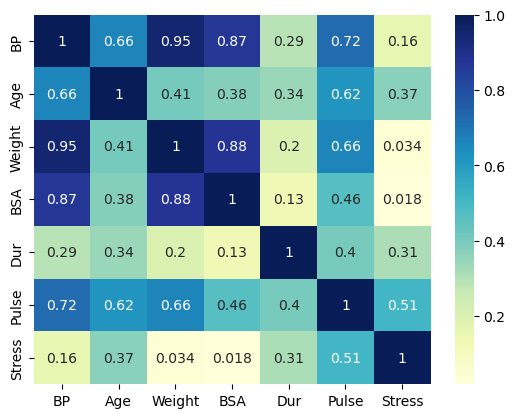

In [2]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = data.corr()

# Plot Heatmap on correlation matrix
sns.heatmap(corr, annot=True, cmap='YlGnBu')

# display the plot
plt.show()

### <u>**OBSERVATIONS**</u>
Here, BP (Blood Pressure) is the dependent or target variable, and the rest of the columns are independent variables or features. We can see that **Weight** and **BSA (Body Surface Area)** have a high correlation. We need to remove one variable **(either Weight or BSA)** to remove the multicollinearity. In our case, **weight** is easier to measure compared to **BSA**, so experts will choose the **weight** and remove the **BSA**.

### Dummy variables
Dummy variables are categorical independent variables used in regression analysis. It is also known as a Boolean, indicator, qualitative, categorical, and binary variable.
It only takes the 1 and 0 binary values, which are equivalent to existence and nonexistence.

> pandas offers the ```get_dummies()``` function to generate the dummy values. Let's understand the get_dummies() function through an example:

In [3]:
# Create pandas DataFrame
data=pd.DataFrame({'Gender':['F','M','M','F','M']})

# Check the top-5 records
data.head()

,Gender
0,F
1,M
2,M
3,F
4,M


In [4]:
# Dummy encoding
encoded_data = pd.get_dummies(data['Gender'])

# Check the top-5 records of the dataframe
encoded_data.head()

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [5]:
# We can remove one column to avoid collinearity using the drop_first=True 
# argument and drop first the N–1 dummies out of N categorical levels
# by removing the first level:

# Dummy encoding
encoded_data = pd.get_dummies(data['Gender'], drop_first=True)

# Check the top-5 records of the dataframe
encoded_data.head()


,M
0,0
1,1
2,1
3,0
4,1


## Developing a linear regression model

After understanding the concepts of regression analysis, multicollinearity, and dummy variables, it's time to get some hands-on experience with regression analysis. Let's learn how to build the regression model using the scientific toolkit for machine learning (scikit- learn):

1. We will first load the dataset using the read_csv() function: 
2. In this step, we will split the data two times:
- Split into two parts: dependent or target variable and independent variables or features.
- Split data into training and test sets. This can be done using the following code:

- After splitting the columns into dependent and independent variable parts, we will split the data into train and test sets in a 75:25 ratio using train_test_split(). The ratio can be specified using the test_size parameter and random_state is used as a seed value for reproducing the same data split each time. If random_state is None, then it will randomly split the records each time, which will give different performance measures:

3. Let's import the LinearRegression model, create its object, and fit it to the training dataset (X_train, y_train). After fitting the model, we can predict the values for testing data (X_test). We can see the intercept and coefficient of the regression equation using the intercept_ and coef_ attributes:


In [14]:
# Read the dataset using read_csv method
df = pd.read_csv("Advertising.csv")

# See the top-5 records in the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']]

# Dependent or Target variable
y = df.Sales
# df["Sales"]

In [16]:
df.shape

(200, 4)

In [19]:
# Lets import the train_test_split method
from sklearn.model_selection import train_test_split

# Import linear regression model
from sklearn.linear_model import LinearRegression

# Distribute the features(X) and labels(y) into two parts training and testing sets
# we can pass in the (train_size) as well.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,test_size=0.25,random_state=0)


# Create linear regression model
lin_reg = LinearRegression()
#lin_reg1 = LinearRegression()


# Fit the linear regression model
lin_reg.fit(X_train, y_train)

# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print("Intercept:",lin_reg.intercept_)
print("Coefficients:",lin_reg.coef_)
print("This is the predictions values")
print(predictions)

print("This is the Actual values")
print(list(y_test))


# y = B + MX + e

Intercept: 2.8925700511511554
Coefficients: [0.04416235 0.19900368 0.00116268]
This is the predictions values
[10.0494569   7.43052335  6.97152143 24.16378667 12.00215643  6.54334645
 13.09526331 14.95879164 11.00528358 16.27234553 22.99324688  9.12188347
 10.33545333 15.39628185 11.60589932 12.11484332 18.60251172 10.81414474
 16.07541355 17.22753644 24.2342995   9.47711838 15.13960412 12.41064749
  5.67814427 15.22889947 12.21635459 20.94370559 13.28068231  9.16578351
 13.30285718 21.5770033  18.098111   21.15572322  6.69734039  6.15355714
  7.96280151 13.09426248 14.81032968  6.22020075 12.2799744   9.1817324
 15.04882696 16.26091437 17.16859664 13.32831849  3.69143664 12.43931798
 15.87909695  8.68626862]
This is the Actual values
[11.3, 8.4, 8.7, 25.4, 11.7, 8.7, 7.2, 13.2, 9.2, 16.6, 24.2, 10.6, 10.5, 15.6, 11.8, 13.2, 17.4, 1.6, 14.7, 17.0, 26.2, 10.3, 14.9, 12.9, 8.1, 15.2, 12.6, 22.6, 11.6, 8.5, 12.5, 23.7, 16.1, 21.8, 5.6, 6.7, 9.7, 12.9, 13.6, 7.2, 10.8, 9.5, 15.0, 15.9, 17.

In [20]:
pre_act_values = pd.DataFrame({
    "Actual_Values" : list(y_test),
    "Predicted_Value": predictions
})

pre_act_values

,Actual_Values,Predicted_Value
0,11.3,10.049457
1,8.4,7.430523
2,8.7,6.971521
3,25.4,24.163787
4,11.7,12.002156
5,8.7,6.543346
6,7.2,13.095263
7,13.2,14.958792
8,9.2,11.005284
9,16.6,16.272346


### Evaluating regression model performance
Model evaluation is one of the key aspects of any machine learning model building process. It helps us to assess how our model will perform when we put it into production. We will use the following metrics for model evaluation:

- **R-squared**
is a statistical model evaluation measure that assesses the goodness of a regression model. It helps data analysts to explain model performance compared to the base model. Its value lies between 0 and 1. A value near 0 represents a poor model while a value near 1 represents a perfect fit. Sometimes, R-squared results in a negative value. This means your model is worse than the average base model
- **MSE** 
Mean Squared Error It is explained as the square of change between the original and forecasted values and the average between them for all the values:
- **MAE** 
Mean Absolute Error It is explained as the absolute change between the original and forecasted values and the average between them for all the values:
- RMSE



In [9]:
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluate mean absolute error
#     1/n E |y-y_ped|
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))

# Evaluate mean squared error
# MSE - 1/n E (y-y_pred) **2
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))

# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))

# Evaluate R-square
# sqrt(1/n E (y-y_pred) **2)
print("R-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 1.3000320919235444
Mean Squared Error(MSE): 4.012497522917097
Root Mean Squared Error(RMSE): 2.00312194409554
R-Square: 0.8576396745320893


In [21]:
# Visualization
import seaborn as sns

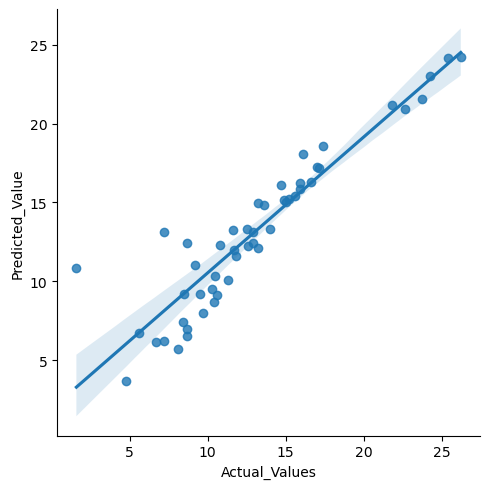

In [22]:
sns.lmplot(x="Actual_Values", y="Predicted_Value", data=pre_act_values)